<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/ARIMA%20Models%20in%20Python/3%20The%20Best%20of%20the%20Best%20Models/3_The_Best_of_the_Best_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 - The Best of the Best Models

In this chapter, you will become a modeler of discerning taste. You'll learn how to identify promising model orders from the data itself, then, once the most promising models have been trained, you'll learn how to choose the best model from this fitted selection. You'll also learn a great framework for structuring your time series projects.

# Intro to ACF and PACF

1. Intro to ACF and PACF
Now you know how to fit ARIMA models and make forecasts, but how do we choose which ARIMA model to fit?

2. Motivation
The model order is very important to the quality of forecasts. Here we have fit different models to the same dataset and then made forecasts using each. The mean predictions of the forecasts are shown as orange lines and you can see that they are very different.

3. ACF and PACF
One of the main ways to identify the correct model order is by using the autocorrelation function, the ACF, and the partial autocorrelation function the PACF.

4. What is the ACF
The autocorrelation function at lag-1 is the correlation between a time series and the same time series offset by one step. The autocorrelation at lag-2 is the correlation between a time series and itself offset by two steps. And so on. When we talk about the autocorrelation function we mean the set of correlation values for different lags

5. What is the ACF
We can plot the autocorrelation function to get an overview of the data. The bars show and ACF values at increasing lags. If these values are small and lie inside the blue shaded region, then they are not statistically significant.

6. What is the PACF
The partial autocorrelation is the correlation between a time series and the lagged version of itself after we subtract the effect of correlation at smaller lags. So it is the correlation associated with just that particular lag. The partial autocorrelation function is this series of values and we can plot it to get another view of the data.

7. Using ACF and PACF to choose model order
By comparing the ACF and PACF for a time series we can deduce the model order. If the amplitude of the ACF tails off with increasing lag and the PACF cuts off after some lag p, then we have a AR(p) model. This plot is an AR(2) model

8. Using ACF and PACF to choose model order
If the amplitude of the ACF cuts off after some lag q and the amplitude of the PACF tails off then we have a MA(q) model. This is an MA(2) model

9. Using ACF and PACF to choose model order
If both the ACF and PACF tail off then we have an ARMA model. In this case we can't deduce the model orders of p and q from the plot.

10. Using ACF and PACF to choose model order
You can refer to the following table when analyzing the ACF and PACF

11. Implementation in Python
In the statsmodel package there are two functions to make plots of the ACF and the PACF. These are plot-underscore-acf and plot-underscore-pacf functions. We import them like this. To use them, we start by creating a figure with two subplots. Into each function we pass the time series DataFrame and the maximum number of lags we would like to see. We also tell it whether to show the autocorrelation at lag-0. The ACF and PACF at lag-0 will always have a value of one so we'll set this argument to false to simplify the plot. Finally we pass it the axis to plot on. The plot-pacf function works in the same way.

12. Implementation in Python
Here are the plots we generated.

13. Over/under differencing and ACF and PACF
The time series must be made stationary before making these plots. If the ACF values are high and tail off very very slowly this is a sign that the data is non-stationarity, so it needs to be differenced.

14. Over/under differencing and ACF and PACF
If the autocorrelation at lag-1 is very negative this is a sign that we have taken the difference too many times.

15. Let's practice!
Now it's time to get down to some data. Let's practice!


# AR or MA

In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:

|| AR(p) |	MA(q) |	ARMA(p,q) |
|---|-------|-------|-----------|
| ACF	| Tails off |	Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p |	Tails off |	Tails off |

A time series with unknown properties, df is available for you in your environment.

Instructions

1. Import the plot_acf and plot_pacf functions from statsmodels.

2. Plot the ACF and the PACF for the series df for the first 10 lags but not the zeroth lag.

In [ ]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

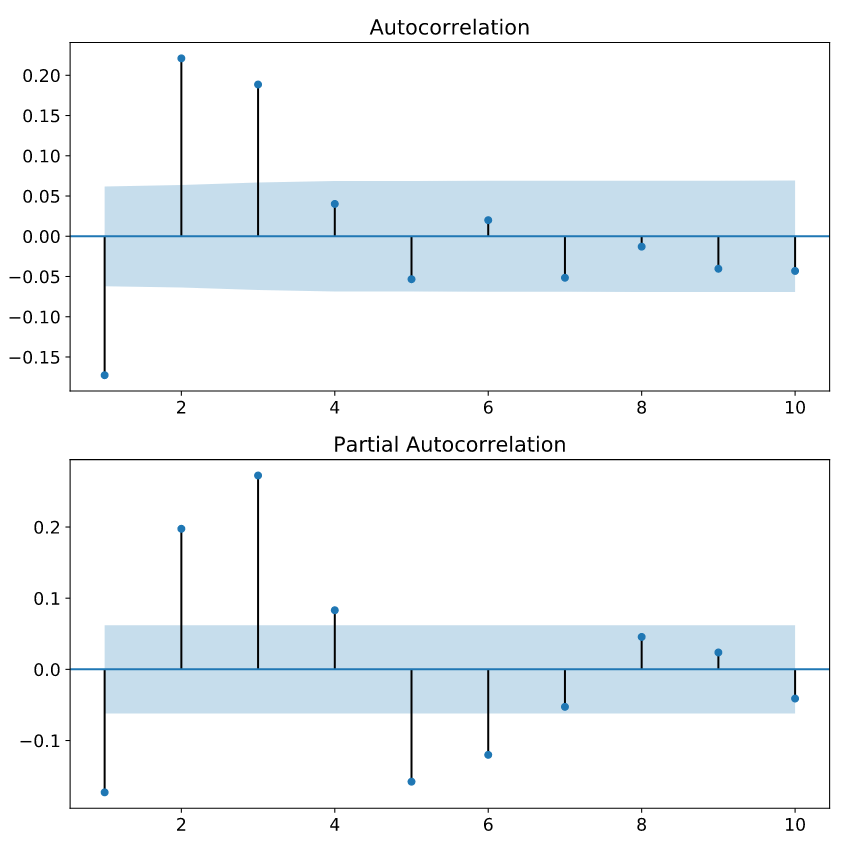

Question

Based on the ACF and PACF plots, what kind of model is this?

1. AR(3)
 - Incorrect Submission: Not quite. The amplitude of the PACF tails off.

2. MA(3)
 - Perfect! The ACF cuts off after 3 lags and the PACF tails off.

3. ARMA(3,3)
 - Incorrect Submission: Not quite. The amplictude of the ACF and the PACF don't both tail off

# Order of earthquakes

In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

|| AR(p) |	MA(q) |	ARMA(p,q) |
|---|-------|-------|-----------|
| ACF	| Tails off |	Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p |	Tails off |	Tails off |

The earthquakes time series earthquake, the plot_acf(), and plot_pacf() functions, and the SARIMAX model class are available in your environment.

Instructions

1. Plot the ACF and the PACF of the earthquakes time series earthquake up to a lag of 15 steps and don't plot the zeroth lag.

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

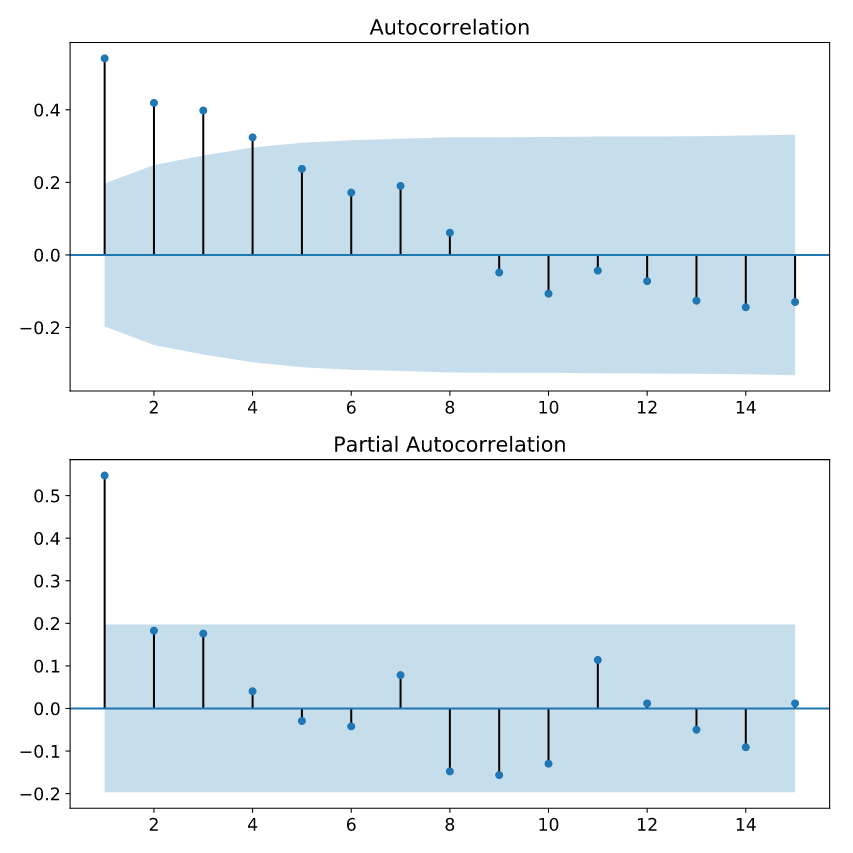

# Question

Look at the ACF/PACF plots and the table above.

What is the most appropriate model for the earthquake data?

Possible Answers

1. ARMA(1,4)
 - Incorrect Submission: If this was true the amplitude of both the ACf and PACF would tail off. We don't see that here.

2. AR(4)
 - Incorrect Submission: Not quite. The PACF cuts off after lag-1 and the ACF tails off.

3. MA(1)
 - Incorrect Submission: Not quite. It is the PACF that cuts off, not the ACF.

4. ARMA(1,1)
 - Incorrect Submission: If this was true the amplitude of both the ACf and PACF would tail off. We don't see that here.

5. AR(1)
 - Correct

Instructions

 2. Create and train a model object for the earthquakes time series.

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = SARIMAX(earthquake, order=(1,0,0))

# Train model
results = model.fit()

Conclusion: In this exercise you just went the whole way from raw data to the optimal trained model! Amazing!

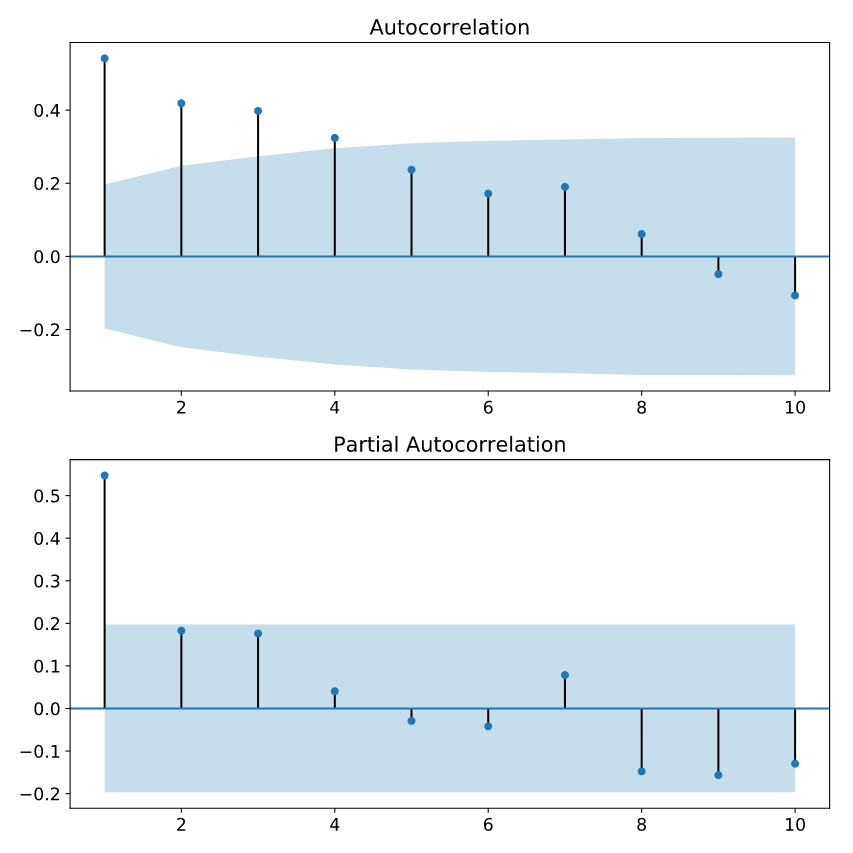

# Intro to AIC and BIC

1. AIC and BIC
In the last lesson, we mentioned how ACF and PACF can't be used to choose the order of a model, when both of the orders p and q are non-zero. However there are more tools we can use, the AIC and the BIC.

2. AIC - Akaike information criterion
The Akaike information criterion, or AIC, is a metric which tells us how good a model is. A model which makes better predictions is given a lower AIC score. The AIC also penalizes models which have lots of parameters. This means if we set the order too high compared to the data, we will get a high AIC value. This stops us overfitting to the training data.

3. BIC - Bayesian information criterion
The Bayesian information criterion, or BIC, is very similar to the AIC. Models which fit the data better have lower BICs and the BIC penalizes overly complex models.

4. AIC vs BIC
For both of these metrics a lower value suggests a better model. The difference between these two metrics is how much they penalize model complexity. The BIC penalizes additional model orders more than AIC and so the BIC will sometimes suggest a simpler model. The AIC and BIC will often choose the same model, but when they don't we will have to make a choice. If our goal is to identify good predictive models, we should use AIC. However if our goal is to identify a good explanatory model, we should use BIC.

5. AIC and BIC in statsmodels
After fitting a model in Python, we can find th AIC and BIC by using the summary of the fitted-models-results object. These are on the right of the table.

6. AIC and BIC in statsmodels
You can also access the AIC and BIC directly by using the dot-aic attribute and the dot-bic attribute of the fitted-model-results object.

7. Searching over AIC and BIC
Being able to access the AIC and BIC directly means we can write loops to fit multiple ARIMA models to a dataset, to find the best model order. Here we loop over AR and MA orders between zero and two, and fit each model. Then we print the model order along with the AIC and BIC scores

8. Searching over AIC and BIC
If we want to test a large number of model orders, we can append the model order and the AIC and BIC to a list, and later covert it to a DataFrame.

9. Searching over AIC and BIC
This means we can sort by the AIC score and not have to search through the orders by eye. We can do the same with the BIC score. In this case the AIC and BIC favor different models, but we want a good predictive model so we will choose the model with the lowest AIC. This is an ARMA(2,1) model.

10. Non-stationary model orders
Sometimes when searching over model orders you will attempt to fit an order that leads to an error. This ValueError tells us that we have tried to fit a model which would result in a non-stationary set of AR coefficients. This is just a bad model for this data, and when we loop over p and q we would like to skip this one.

11. When certain orders don't work
We can skip these orders in our loop by using a try and except block in python. Here's the code we had before.

12. When certain orders don't work
First we try to run the code in the try statement. We try to fit the model and print the scores. If this fails then the code in the except statement is run, where we print None for the scores

13. Let's practice!
You've been learning a lot about the AIC and BIC. Time for you to put it to practice!

# Searching over model order

In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

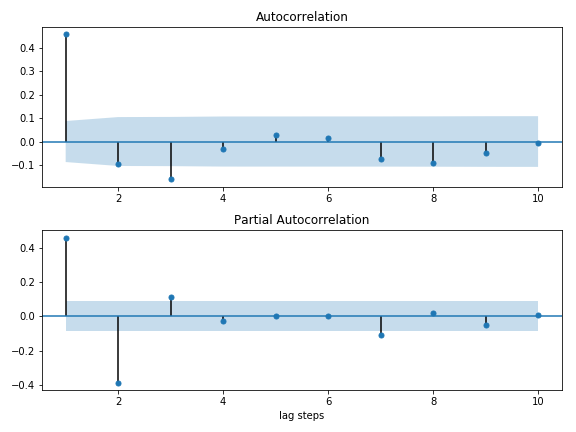

The SARIMAX model class and the time series DataFrame df are available in your environment.

Instructions

1. Loop over values of p from 0-2.

2. Loop over values of q from 0-2.

3. Train and fit an ARMA(p,q) model.

4. Append a tuple of (p,q, AIC value, BIC value) to order_aic_bic.

In [ ]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

Conclusion

Fantastic! You built 9 models in just a few seconds! In the next exercise you will evaluate the results to choose the best model.

# Choosing order with AIC and BIC

Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

The list of tuples of `(p,q, AIC value, BIC value)` that you created in the last exercise, order_aic_bic, is available in your environment. pandas has also been imported as pd.

Instructions

1. Create a DataFrame to hold the order search information in the order_aic_bic list. Give it the column names ['p', 'q', 'AIC', 'BIC'].

2. Print the DataFrame in order of increasing AIC and then BIC.

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

'''
<script.py> output:
       p  q          AIC          BIC
    7  2  1  1414.248679  1431.107112
    8  2  2  1416.084892  1437.157932
    5  1  2  1417.029939  1433.888371
    6  2  0  1419.109454  1431.753279
    2  0  2  1425.057439  1437.701264
    4  1  1  1428.051695  1440.695520
    1  0  1  1429.988724  1438.417940
    3  1  0  1497.307531  1505.736748
    0  0  0  1615.493870  1619.708478
    
       p  q          AIC          BIC
    7  2  1  1414.248679  1431.107112
    6  2  0  1419.109454  1431.753279
    5  1  2  1417.029939  1433.888371
    8  2  2  1416.084892  1437.157932
    2  0  2  1425.057439  1437.701264
    1  0  1  1429.988724  1438.417940
    4  1  1  1428.051695  1440.695520
    3  1  0  1497.307531  1505.736748
    0  0  0  1615.493870  1619.708478
'''

Question

Which of the following models is the best fit?

1. ARMA(0,0)
 - Incorrect Submission: This has the maximum AIC and BIC!

2. ARMA(2,0)
 - Incorrect Submission: Remember you want to minimize AIC and BIC.

3. ARMA(0,2)
 - Incorrect Submission: Remember you want to minimize AIC and BIC.

4. ARMA(2,1)
 - Perfect! This time AIC and BIC favored the same model, but this won't always be the case.

5. ARMA(2,2)
 - Incorrect Submission: Remember you want to minimize AIC and BIC.

# AIC and BIC vs ACF and PACF

In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

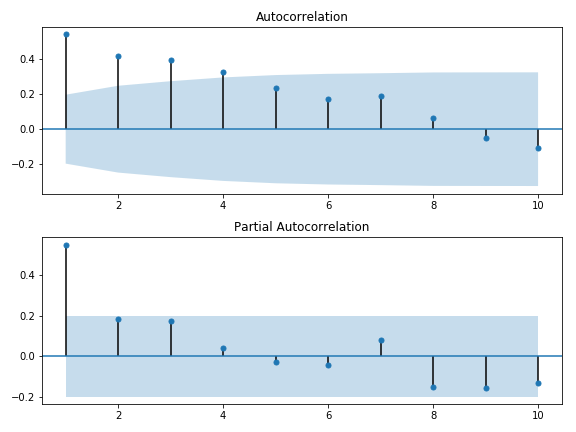

The SARIMAX model class and the time series DataFrame earthquake are available in your environment.

Instructions

1. Loop over orders of p and q between 0 and 2.

2. Inside the loop try to fit an ARMA(p,q) to earthquake on each loop.

3. Print p and q alongside AIC and BIC in each loop.

4. If the model fitting procedure fails print p, q, None, None.

In [ ]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake, order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

'''
<script.py> output:
    0 0 888.4297722924081 891.0248921425426
    0 1 799.6741727812073 804.8644124814765
    0 2 761.0674787503889 768.8528383007927
    1 0 666.6455255041611 671.8357652044303
    1 1 647.1322999673815 654.9176595177853
    1 2 648.7385664620634 659.1190458626018
    2 0 656.0283744146391 663.8137339650428
    2 1 None None
    2 2 648.8506443429098 661.8262435935828
'''

Conclusion

Super! If you look at your printed results you will see that the AIC and BIC both actually favor an ARMA(1,1) model. This isn't what you predicted from the ACF and PACF but notice that the lag 2-3 PACF values are very close to significant, so the ACF/PACF are close to those of an ARMA(p,q) model.

# Model diagnostics

Got It!
1. Model diagnostics
You've come a long way, but our work isn't finished once we have built the model. The next step is using common model diagnostics to confirm our model is behaving well.

2. Introduction to model diagnostics
After we have picked a final model or a final few models we should ask how good they are. This is a key part of the model building life cycle.

3. Residuals
To diagnose our model we focus on the residuals to the training data. The residuals are the difference between the our model's one-step-ahead predictions and the real values of the time series.

4. Residuals
In statsmodels the residuals over the training period can be accessed using the dot-resid attribute of the results object. These are stored as a pandas series.

5. Mean absolute error
We might like to know, on average, how large the residuals are and so how far our predictions are from the true values. To answer this we can calculate the mean absolute error of the residuals. We can do this in Python using the numpy-dot-abs and the numpy-dot-mean functions.

6. Plot diagnostics
For an ideal model the residuals should be uncorrelated white Gaussian noise centered on zero. The rest of our diagnostics will help us to see if this is true. We can use the results object's dot-plot-underscore-diagnostics method to generate four common plots for evaluating this. These are shown on the right.

7. Residuals plot
One of the four plots shows the one-step-ahead standardized residuals. If our model is working correctly, there should be no obvious structure in the residuals.

8. Residuals plot
Here the plot on the left has no obvious pattern, but the plot on the right does.

9. Histogram plus estimated density
Another of the four plots, shows us the distribution of the residuals. The histogram shows us the measured distribution; the orange line shows a smoothed version of this histogram; and the green line, shows a normal distribution. If our model is good these two lines should be almost the same. Here, the plot on the left looks fine, but the plot on the right doesn't.

10. Normal Q-Q
The normal Q-Q plot is another way to show how the distribution of the model residuals compares to a normal distribution. If our residuals are normally distributed then all the points should lie along the red line, except perhaps some values at either end.

11. Correlogram
The last plot is the correlogram, which is just an ACF plot of the residuals rather than the data. 95% of the correlations for lag greater than zero should not be significant. If there is significant correlation in the residuals, it means that there is information in the data that our model hasn't captured.

12. Summary statistics
Some of these plots also have accompanying test statistics in results dot-summary tables. Prob(Q) is the p-value associated with the null hypothesis that the residuals have no correlation structure. Prob(JB) is the p-value associated with the null hypothesis that the residuals are Guassian normally distributed. If either p-value is less than 0.05 we reject that hypothesis.

13. Let's practice!
Now let's use some of these new tools in practice!

# Mean absolute error

Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

numpy has been imported into your environment as np and the earthquakes time series is available for you as earthquake.

Instructions

1. Use np functions to calculate the Mean Absolute Error (MAE) of the .resid attribute of the results object.

2. Print the MAE.

3. Use the DataFrame's .plot() method with no arguments to plot the earthquake time series.

In [ ]:
# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

'''
<script.py> output:
    4.755625669545705
'''

Conclusion

Great! Your mean error is about 4-5 earthquakes per year. You have plotted the time series so that you can see how the MAE compares to the spread of the time series. Considering that there are about 20 earthquakes per year that is not too bad.

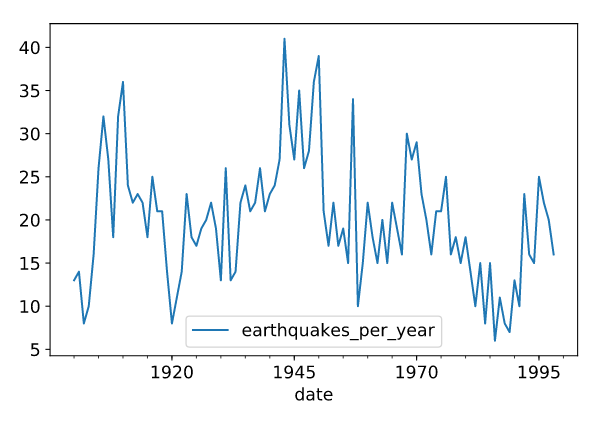

# Diagnostic summary statistics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

|Test |	Null hypothesis |	P-value name |
|-----|-----------------|--------------|
| Ljung-Box |	There are no correlations in the residual | Prob(Q) |
|Jarque-Bera | The residuals are normally distributed |	Prob(JB) |

An unknown time series df and the SARIMAX model class are available for you in your environment.

Instructions

1. Fit an ARMA(3,1) model to the time series df.

2. Print the model summary.

In [ ]:
# Create and fit model
model1 = SARIMAX(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

'''
<script.py> output:
                               Statespace Model Results                           
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                  300
    Model:               SARIMAX(3, 0, 1)   Log Likelihood                -407.842
    Date:                Sat, 13 Feb 2021   AIC                            825.683
    Time:                        00:09:17   BIC                            844.202
    Sample:                    01-01-2013   HQIC                           833.095
                             - 10-27-2013                                         
    Covariance Type:                  opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ar.L1          0.1533      0.139      1.100      0.271      -0.120       0.427
    ar.L2          0.2072      0.060      3.471      0.001       0.090       0.324
    ar.L3          0.2522      0.061      4.139      0.000       0.133       0.372
    ma.L1         -0.4277      0.145     -2.952      0.003      -0.712      -0.144
    sigma2         0.8868      0.073     12.148      0.000       0.744       1.030
    ===================================================================================
    Ljung-Box (Q):                       31.16   Jarque-Bera (JB):                 0.04
    Prob(Q):                              0.84   Prob(JB):                         0.98
    Heteroskedasticity (H):               1.33   Skew:                            -0.03
    Prob(H) (two-sided):                  0.16   Kurtosis:                         3.01
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
'''

Question

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results1?

1. They are not correlated and are normally distributed.
 - Correct.
2. They are correlated and are normally distributed.
 - Incorrect Submission: Prob(Q) is larger than 0.05. We shouldn't reject the null that the residuals are uncorrelated.

3. They are not correlated and are not normally distributed.
 - Incorrect Submission: Prob(JB) is not less than 0.05. We shouldn't reject the null that the residuals are normally distributed.

4. They are correlated and are not normally distributed.
 - Incorrect Submission: Remember that we only reject the null hypothesis is the p-value is less than 0.05.

5. The outcome of tests are not conclusive.
 - Incorrect Submission: This could be the case if the p-values were close to 0.05 but not this time.

Instructions

3. Fit an AR(2) model to the time series df.

4. Print the model summary.

In [ ]:
# Create and fit model
model2 = SARIMAX(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

'''
<script.py> output:
                               Statespace Model Results                           
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                  300
    Model:               SARIMAX(2, 0, 0)   Log Likelihood                -422.266
    Date:                Sat, 13 Feb 2021   AIC                            850.532
    Time:                        00:21:27   BIC                            861.643
    Sample:                    01-01-2013   HQIC                           854.979
                             - 10-27-2013                                         
    Covariance Type:                  opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ar.L1         -0.2159      0.053     -4.045      0.000      -0.320      -0.111
    ar.L2          0.0654      0.057      1.156      0.248      -0.045       0.176
    sigma2         0.9773      0.076     12.831      0.000       0.828       1.127
    ===================================================================================
    Ljung-Box (Q):                       59.13   Jarque-Bera (JB):                 1.35
    Prob(Q):                              0.03   Prob(JB):                         0.51
    Heteroskedasticity (H):               1.50   Skew:                            -0.10
    Prob(H) (two-sided):                  0.04   Kurtosis:                         3.26
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
'''

Question

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results2?

1. They are not correlated and are normally distributed.
 - Incorrect Submission: Prob(Q) is smaller than 0.05. We should reject the null that the residuals are uncorrelated.

2. They are correlated and are normally distributed.
 - Correct: Conclusion: Great. Our model didn't pull out all the correlations in the data. This suggests we could make it better. Perhaps by increasing the model order.

3. They are not correlated and are not normally distributed.
 - Incorrect Submission: Prob(JB) is not less than 0.05. We shouldn't reject the null that the residuals are normally distributed.

4. They are correlated and are not normally distributed.
 - Incorrect Submission: Remember that we reject the null hypothesis if is the p-value is less than 0.05.

5. The outcome of tests are not conclusive.
 - Incorrect Submission: This could be the case if the p-values were close to 0.05 but not this time.

Plot diagnostics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

Test	Good fit
Standardized residual	There are no obvious patterns in the residuals
Histogram plus kde estimate	The KDE curve should be very similar to the normal distribution
Normal Q-Q	Most of the data points should lie on the straight line
Correlogram	95% of correlations for lag greater than one should not be significant
An unknown time series df and the SARIMAX model class are available for you in your environment.-

Instructions 1/3
35 XP
1
2
3
Instructions 1/3
35 XP
1
2
3
Fit an ARIMA(1,1,1) model to the time series df.
Create the 4 diagnostic plots.